<a href="https://colab.research.google.com/github/zrdagdelen/-_-/blob/main/%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B03_4%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
cube_dat = """8
12
-0.5 -0.5 -0.5
0.5 -0.5 -0.5
0.5 0.5 -0.5
-0.5 0.5 -0.5
-0.5 -0.5 0.5
0.5 -0.5 0.5
0.5 0.5 0.5
-0.5 0.5 0.5
0 1
1 2
2 3
3 0
4 5
5 6
6 2
5 1
4 0
6 7
7 4
7 3
"""

bunny_dat="""23
43
-0.8 -0.6 -0.3
0.8 -0.6 -0.3
0.8 0.6 -0.3
-0.8 0.6 -0.3
-0.8 -0.6 0.5
0.8 -0.6 0.5
0.8 0.6 0.5
-0.8 0.6 0.5
-0.6 0.7 0.7
-0.3 0.7 0.7
-0.6 0.7 0.9
-0.3 0.7 0.9
-0.45 1.8 0.8
0.3 0.7 0.7
0.6 0.7 0.7
0.3 0.7 0.9
0.6 0.7 0.9
0.45 1.8 0.8
-0.3 0.2 0.6
0.3 0.2 0.6
0.0 0.0 0.8
-0.2 -0.2 0.7
0.2 -0.2 0.7
0 1
1 2
2 3
3 0
4 5
5 6
6 7
7 4
0 4
1 5
2 6
3 7
8 9
9 11
11 10
10 8
8 12
9 12
10 12
11 12
13 14
14 16
16 15
15 13
13 17
14 17
15 17
16 17
8 7
9 7
10 7
11 7
13 6
14 6
15 6
16 6
20 6
20 7
21 22
21 20
22 20
21 4
22 5
"""


with open("cube.dat", "w", encoding="utf-8") as f:
    f.write(cube_dat)
with open("bunny.dat", "w", encoding="utf-8") as f:
    f.write(bunny_dat)

In [ ]:
# ====== Классы
class Vertex:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def to_array(self):
        return np.array([self.x, self.y, self.z])

class Edge:
    def __init__(self, v1_idx, v2_idx):
        self.v1_idx = v1_idx
        self.v2_idx = v2_idx

class Object3D:
    def __init__(self, vertices, edges):
        self.vertices = vertices
        self.edges = edges

    @classmethod
    def from_dat_file(cls, filename):
        if not os.path.exists(filename):
            raise FileNotFoundError(f"Файл {filename} не найден.")
        with open(filename, 'r') as f:
            lines = f.readlines()
        num_vertices = int(lines[0].strip())
        num_edges = int(lines[1].strip())
        vertices = []
        for i in range(2, 2 + num_vertices):
            x, y, z = map(float, lines[i].strip().split())
            vertices.append(Vertex(x, y, z))
        edges = []
        for i in range(2 + num_vertices, 2 + num_vertices + num_edges):
            v1, v2 = map(int, lines[i].strip().split())
            edges.append(Edge(v1, v2))
        return cls(vertices, edges)

    def get_points_and_edges(self):
        points = np.array([v.to_array() for v in self.vertices])
        edges_indices = [(e.v1_idx, e.v2_idx) for e in self.edges]
        return points, edges_indices

# ====== Матрицы преобразований
def rot_x(angle):
    t = np.deg2rad(angle)
    return np.array([[1, 0, 0], [0, np.cos(t), -np.sin(t)], [0, np.sin(t), np.cos(t)]])

def rot_y(angle):
    t = np.deg2rad(angle)
    return np.array([[np.cos(t), 0, np.sin(t)], [0, 1, 0], [-np.sin(t), 0, np.cos(t)]])

def rot_z(angle):
    t = np.deg2rad(angle)
    return np.array([[np.cos(t), -np.sin(t), 0], [np.sin(t), np.cos(t), 0], [0, 0, 1]])

def transform(points, rx, ry, rz, tx, ty, scale):
    R = rot_x(rx) @ rot_y(ry) @ rot_z(rz)
    P = (R @ points.T).T * scale
    P += np.array([tx, ty, 0])
    return P

# ====== Загрузка объектов с fallback ======
objects = {}

objects['Cube'] = Object3D.from_dat_file('cube.dat')


#objects['Tetrahedron'] = Object3D.from_dat_file('tetrahedron.dat')
objects['Bunnys_head'] = Object3D.from_dat_file('bunny.dat')


In [ ]:
def draw_static(object_name, rx=0, ry=0, rz=0, tx=0, ty=0, scale=1.5):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')

    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True)

    obj = objects[object_name]
    points, edges = obj.get_points_and_edges()

    # применяем 3D-преобразование как раньше
    P3 = transform(points, rx, ry, rz, tx, ty, scale)

    # но берём только x и y
    P = P3[:, :2]

    # рисуем рёбра как линии на плоскости
    for e in edges:
        p1, p2 = P[e[0]], P[e[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='blue', linewidth=2)

    plt.show()


In [ ]:
from ipywidgets import interact
interact(draw_static, object_name=['Cube', 'Bunnys_head'], rx=(-180, 180, 1), ry=(-180, 180, 1), rz=(-180, 180, 1), tx=(0, 1, 0.01), ty=(0, 1, 0.01), tz=(0, 1, 0.01), scale=(0, 1.5, 0.1))

interactive(children=(Dropdown(description='object_name', options=('Cube', 'Bunnys_head'), value='Cube'), IntS…

<function __main__.draw_static(object_name, rx=0, ry=0, rz=0, tx=0, ty=0, scale=1.5)>

In [ ]:
def look_at(camera_pos, target, up=np.array([0, 0, 1])):
    forward = (target - camera_pos)
    forward = forward / np.linalg.norm(forward)

    right = np.cross(up, forward)
    right = right / np.linalg.norm(right)

    up_corrected = np.cross(forward, right)

    R = np.vstack([right, up_corrected, forward])
    return R


def project_perspective(points, camera_pos, target):
    R = look_at(camera_pos, target)

    # преобразуем точки в координаты камеры
    Pc = (R @ (points - camera_pos).T).T

    # исключаем точки за камерой
    z = Pc[:, 2]
    z[z == 0] = 1e-6  # защита от деления

    # перспективная проекция
    x2d = Pc[:, 0] / z
    y2d = Pc[:, 1] / z

    return np.column_stack([x2d, y2d])


def draw_static(object_name,
                rx=0, ry=0, rz=0,
                tx=0, ty=0, tz=0,
                scale=1.5,
                cx=2, cy=2, cz=2,      # камера
                tx0=0, ty0=0, tz0=0):  # точка, куда смотрим
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')

    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)

    obj = objects[object_name]
    points, edges = obj.get_points_and_edges()

    # сначала обычное 3D-преобразование объекта
    P3 = transform(points, rx, ry, rz, tx, ty, tz, scale)

    # затем — перспективная проекция
    P2 = project_perspective(
        P3,
        camera_pos=np.array([cx, cy, cz]),
        target=np.array([tx0, ty0, tz0])
    )

    # рисуем рёбра
    for e in edges:
        p1, p2 = P2[e[0]], P2[e[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth=2, color='blue')

    plt.show()


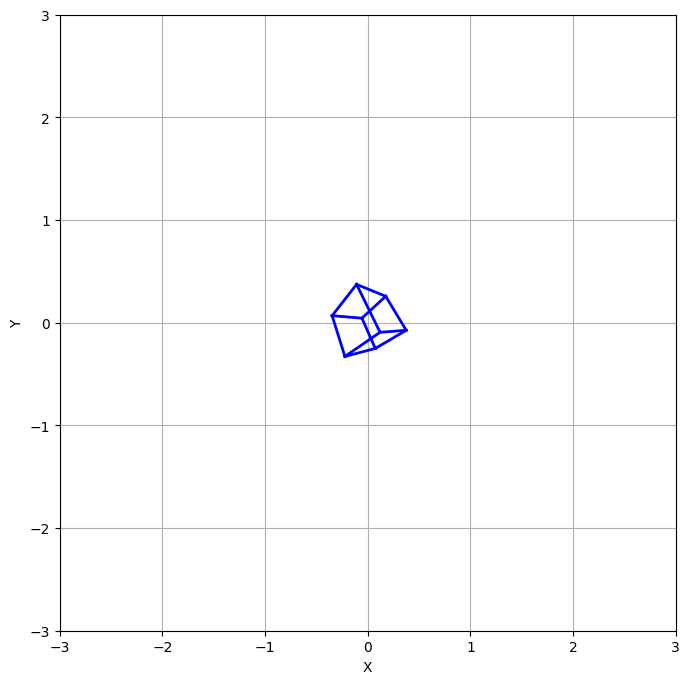

In [ ]:
draw_static("Cube",
            rx=20, ry=40, scale=2,
            cx=3, cy=3, cz=2,      # камера
            tx0=0, ty0=0, tz0=0)   # смотрим на центр

In [ ]:

interact(draw_static,object_name=['Tetrahedron', 'Cube'], rx=(-180, 180, 1), ry=(-180, 180, 1), rz=(-180, 180, 1),
            tx=(0, 1, 0.01), ty=(0, 1, 0.01),
            tz=(0, 1, 0.01), scale=(1, 5, 1),
            cx=(-5, 5, 1), cy=(-5,5,1), cz=(-5,5,1),
            tx0=(-1, 1, 1), ty0=(-1, 1, 1), tz0=(-1, 1, 1))

interactive(children=(Dropdown(description='object_name', options=('Tetrahedron', 'Cube'), value='Tetrahedron'…

<function __main__.draw_static(object_name, rx=0, ry=0, rz=0, tx=0, ty=0, tz=0, scale=1.5, cx=2, cy=2, cz=2, tx0=0, ty0=0, tz0=0)>

дальше 4 лаба


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --------------------------
#   ОБЪЕКТЫ
# --------------------------

class Object3D:
    def __init__(self, points, edges, faces):
        self.points = np.array(points, dtype=float)
        self.edges = edges
        self.faces = faces

cube_points = [
    [-1,-1,-1],[1,-1,-1],[1,1,-1],[-1,1,-1],
    [-1,-1, 1],[1,-1, 1],[1,1, 1],[-1,1, 1]
]
cube_edges = [
    [0,1],[1,2],[2,3],[3,0],
    [4,5],[5,6],[6,7],[7,4],
    [0,4],[1,5],[2,6],[3,7]
]
cube_faces = [
    [0,1,2,3],
    [4,5,6,7],
    [0,1,5,4],
    [2,3,7,6],
    [1,2,6,5],
    [0,3,7,4]
]

tet_points = [
    [0,0,2],[1.5,0,0],
    [-0.75,1.3,0],[-0.75,-1.3,0]
]
tet_edges = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
tet_faces = [
    [0,1,2],[0,1,3],
    [0,2,3],[1,2,3]
]
L_points = [
    [0,0,0],[2,0,0],[2,1,0],[1,1,0],[1,2,0],[0,2,0],
    [0,0,1],[2,0,1],[2,1,1],[1,1,1],[1,2,1],[0,2,1]
]
L_edges = []
for i in range(6):
    L_edges.append([i,(i+1)%6])
    L_edges.append([6+i,6+((i+1)%6)])
    L_edges.append([i,6+i])
L_faces = [
    [0,1,2,3,4,5],[6,7,8,9,10,11],
    [0,1,7,6],[1,2,8,7],[2,3,9,8],[3,4,10,9],[4,5,11,10],[5,0,6,11]
]


In [ ]:
# УПРОЩЕННАЯ ГОЛОВА кролика С ПИРАМИДАЛЬНЫМИ УШАМИ (18 вершин)

vertices = [
    # Основная форма: куб/сфера (8 вершин)
    [-0.8, -0.6, -0.3],  # 0: зад-лево-низ
    [0.8, -0.6, -0.3],   # 1: зад-право-низ
    [0.8, 0.6, -0.3],    # 2: перед-право-низ
    [-0.8, 0.6, -0.3],   # 3: перед-лево-низ

    [-0.8, -0.6, 0.5],   # 4: зад-лево-верх
    [0.8, -0.6, 0.5],    # 5: зад-право-верх
    [0.8, 0.6, 0.5],     # 6: перед-право-верх
    [-0.8, 0.6, 0.5],    # 7: перед-лево-верх

    # Левое ухо: пирамида (4 вершины)
    [-0.6, 0.7, 0.7],    # 8: левое ухо - заднее основание (лево)
    [-0.3, 0.7, 0.7],    # 9: левое ухо - заднее основание (право)
    [-0.6, 0.7, 0.9],    # 10: левое ухо - переднее основание (лево)
    [-0.3, 0.7, 0.9],    # 11: левое ухо - переднее основание (право)
    [-0.45, 1.8, 0.8],   # 12: кончик левого уха (вершина пирамиды)

    # Правое ухо: пирамида (4 вершины)
    [0.3, 0.7, 0.7],     # 13: правое ухо - заднее основание (лево)
    [0.6, 0.7, 0.7],     # 14: правое ухо - заднее основание (право)
    [0.3, 0.7, 0.9],     # 15: правое ухо - переднее основание (лево)
    [0.6, 0.7, 0.9],     # 16: правое ухо - переднее основание (право)
    [0.45, 1.8, 0.8],    # 17: кончик правого уха (вершина пирамиды)

    # Глаза (4 вершины)
    [-0.3, 0.2, 0.6],    # 18: левый глаз
    [0.3, 0.2, 0.6],     # 19: правый глаз

    # Нос (1 вершина)
    [0.0, 0.0, 0.8],     # 20: нос

    # Рот (2 вершины)
    [-0.2, -0.2, 0.7],   # 21: левый угол рта
    [0.2, -0.2, 0.7],    # 22: правый угол рта
]

edges = [
    # Основной куб
    [0, 1], [1, 2], [2, 3], [3, 0],  # низ
    [4, 5], [5, 6], [6, 7], [7, 4],  # верх
    [0, 4], [1, 5], [2, 6], [3, 7],  # бок

    # Левое ухо: основание пирамиды (прямоугольник)
    [8, 9], [9, 11], [11, 10], [10, 8],  # основание

    # Левое ухо: ребра от основания к вершине
    [8, 12], [9, 12], [10, 12], [11, 12],

    # Правое ухо: основание пирамиды
    [13, 14], [14, 16], [16, 15], [15, 13],  # основание

    # Правое ухо: ребра от основания к вершине
    [13, 17], [14, 17], [15, 17], [16, 17],

    # Соединение ушей с головой
    [8, 7], [9, 7], [10, 7], [11, 7],  # левое ухо к голове
    [13, 6], [14, 6], [15, 6], [16, 6],  # правое ухо к голове

    # Нос (соединяем с передней частью головы)
    [20, 6], [20, 7],

    # Рот
    [21, 22],  # линия рта
    [21, 20], [22, 20],  # рот к носу
    [21, 4], [22, 5],  # рот к низу головы
]

faces = [
    # Грани куба (голова)
    [0, 1, 2, 3],  # нижняя грань
    [4, 5, 6, 7],  # верхняя грань
    [0, 1, 5, 4],  # задняя грань
    [2, 3, 7, 6],  # передняя грань
    [1, 2, 6, 5],  # правая боковая грань
    [0, 3, 7, 4],  # левая боковая грань

    # Левое ухо: грани пирамиды
    # Основание пирамиды
    [8, 9, 11, 10],

    # Боковые грани пирамиды
    [8, 9, 12],  # задняя грань
    [9, 11, 12],  # правая боковая грань
    [11, 10, 12],  # передняя грань
    [10, 8, 12],  # левая боковая грань

    # Соединение основания уха с головой
    [8, 9, 7], [9, 11, 7], [11, 10, 7], [10, 8, 7],

    # Правое ухо: грани пирамиды
    # Основание пирамиды
    [13, 14, 16, 15],

    # Боковые грани пирамиды
    [13, 14, 17],  # задняя грань
    [14, 16, 17],  # правая боковая грань
    [16, 15, 17],  # передняя грань
    [15, 13, 17],  # левая боковая грань

    # Соединение основания уха с головой
    [13, 14, 6], [14, 16, 6], [16, 15, 6], [15, 13, 6],


    # Нос (пирамидка к передней части)
    [20, 6, 7],  # верхний треугольник
    [20, 2, 3],  # нижний треугольник
    [20, 6, 2],  # правый треугольник
    [20, 7, 3],  # левый треугольник

    # Рот
    [21, 22, 20],  # треугольник рот-нос
    [21, 22, 4], [21, 22, 5],  # треугольники рот-низ головы
]

In [ ]:
bunny_head = Object3D(
    vertices,
    edges,
    faces
)

In [ ]:
objects = {
    "Cube": Object3D(cube_points, cube_edges, cube_faces),
    "Tetra": Object3D(tet_points, tet_edges, tet_faces),
    "Lshape": Object3D(L_points, L_edges, L_faces),
    "Bunny Head": bunny_head
}

In [ ]:


# --------------------------
#      Камера
# --------------------------

def look_at(cam, target):
    forward = target - cam
    forward /= np.linalg.norm(forward)
    right = np.cross([0,0,1], forward)
    right /= np.linalg.norm(right)
    up = np.cross(forward, right)
    return np.vstack([right, up, forward])

def project(points, cam, target):
    R = look_at(cam, target)
    pts = (R @ (points - cam).T).T
    z = pts[:,2]
    z[z<=1e-6] = 1e-6
    return np.column_stack([pts[:,0]/z, pts[:,1]/z]), pts

# --------------------------
#   Пересечение луча с треугольником
# --------------------------

def ray_triangle_intersect(O, D, A, B, C):
    EPS = 1e-6
    AB = B - A
    AC = C - A
    P = np.cross(D, AC)
    det = np.dot(AB, P)

    if abs(det) < EPS:
        return None

    inv_det = 1.0 / det
    T = O - A
    u = np.dot(T, P) * inv_det
    if u < 0 or u > 1:
        return None

    Q = np.cross(T, AB)
    v = np.dot(D, Q) * inv_det
    if v < 0 or u + v > 1:
        return None

    t = np.dot(AC, Q) * inv_det
    return t if t > EPS else None

# --------------------------
#   Проверка скрытия ребра
# --------------------------
def edge_hidden(A, B, faces_points, cam):
    M = (A + B) * 0.5
    D = M - cam
    D /= np.linalg.norm(D)
    dist_M = np.linalg.norm(M - cam)

    for face in faces_points:
        # Триангулируем любую грань
        tris = []
        n = len(face)
        for i in range(1, n-1):
            tris.append((face[0], face[i], face[i+1]))

        for tA, tB, tC in tris:
            t = ray_triangle_intersect(cam, D, tA, tB, tC)
            if t is not None and t < dist_M - 1e-6:
                return True
    return False


# --------------------------
#   Рисование
# --------------------------

def draw(object_name,
         rx=0, ry=0, rz=0,
         cam=(4,4,4), target=(0,0,0),
         scale=1.5):
    #cam=(4,4,4)
    #target=(0,0,0)
    obj = objects[object_name]
    points = obj.points * scale
    rx= math.radians(rx)
    ry= math.radians(ry)
    rz= math.radians(rz)
    # вращение
    Rx = np.array([[1,0,0],[0,np.cos(rx),-np.sin(rx)],
                   [0,np.sin(rx), np.cos(rx)]])
    Ry = np.array([[np.cos(ry),0,np.sin(ry)],[0,1,0],
                   [-np.sin(ry),0,np.cos(ry)]])
    Rz = np.array([[np.cos(rz),-np.sin(rz),0],
                   [np.sin(rz), np.cos(rz),0],[0,0,1]])

    points = (Rz @ Ry @ Rx @ points.T).T

    cam = np.array(cam, float)
    target = np.array(target, float)

    P2, P3_cam = project(points, cam, target)

    fig, ax = plt.subplots(figsize=(7,7))
    ax.set_aspect("equal")
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.grid(True)
    ax.set_title(object_name)

    faces_3d = [[points[i] for i in face] for face in obj.faces]

    for e in obj.edges:
        A = points[e[0]]
        B = points[e[1]]
        A2 = P2[e[0]]
        B2 = P2[e[1]]

        if edge_hidden(A, B, faces_3d, cam):
            ax.plot([A2[0], B2[0]], [A2[1], B2[1]],
                    "gray", linestyle="dashed", lw=1)
        else:
            ax.plot([A2[0], B2[0]], [A2[1], B2[1]],
                    "blue", lw=2)
    plt.show()


# ------------------------------------
#         ТЕСТЫ
# ------------------------------------

#draw("Cube", rx=0.6, ry=0.4, cam=(4,3,3))
#draw("Tetra", rx=0.4, ry=0.8, cam=(3,4,4))
#print("L-shape (non-convex)")
#draw("Lshape", rx=0.2, ry=0.1, cam=(4,4,3))
from ipywidgets import interact
interact(draw, object_name=['Tetra', 'Cube', 'Lshape', 'Bunny Head'], rx=(-360, 360, 10), ry=(-360, 360, 10), rz=(-360, 360, 10), cam=[(2,2,1),(1,1,1)], target=[(0,0,0),(1,0,1),(1,1,1)])


interactive(children=(Dropdown(description='object_name', options=('Tetra', 'Cube', 'Lshape', 'Bunny Head'), v…

<function __main__.draw(object_name, rx=0, ry=0, rz=0, cam=(4, 4, 4), target=(0, 0, 0), scale=1.5)>